# Formatting Plots

## Setup

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

fb = pd.read_csv(
    'data/fb_stock_prices.csv', index_col='Date', parse_dates=True
)

## Titles and Axis Labels
- `plt.suptitle()` adds a title to plots and subplots
- `plt.title()` adds a title to a single plot. Note if you use subplots, it will only put the title on the last subplot, so you will need to use `plt.suptitle()`
- `plt.xlabel()` labels the x-axis
- `plt.ylabel()` labels the y-axis

Text(0, 0.5, 'price ($)')

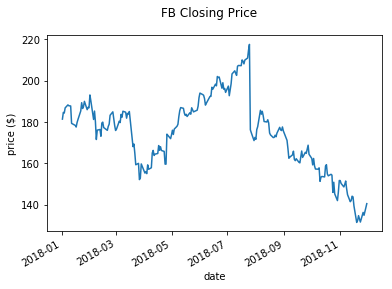

In [2]:
fb.Close.plot()
plt.suptitle('FB Closing Price')
plt.xlabel('date')
plt.ylabel('price ($)')

## Legends
`plt.legend()` adds a legend to the plot. We can specify where to place it with the `loc` parameter:

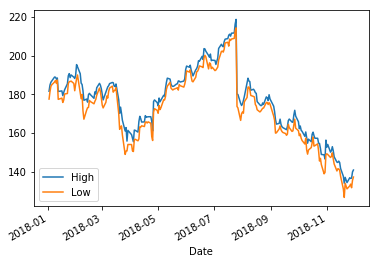

In [3]:
fb.plot(y=['High', 'Low'])
plt.legend(loc='lower left')

## Formatting Axes
### Specifying axis limits
`plt.xlim()` and `plt.ylim()` can be used to specify the minimum and maximum values for the axis. Passing `None` will have `matplotlib` determine the limit.

(0, 220.15449999999998)

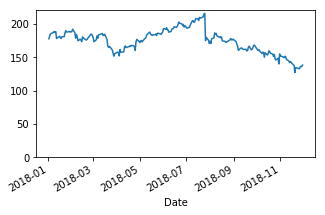

In [4]:
fb.Open.plot(figsize=(5, 3))
plt.ylim(0, None)

### Formatting the Axis Ticks
We can use `plt.xticks()` and `plt.yticks()` to provide tick labels and specify, which ticks to show. Here, we show every other month:

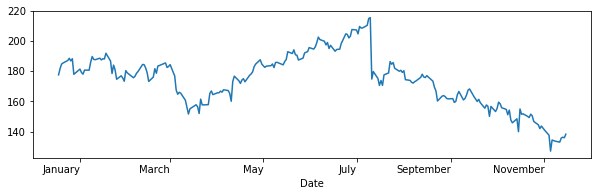

In [5]:
import calendar

fb.Open.plot(figsize=(10, 3), rot=0)
locs, labels = plt.xticks()
plt.xticks(locs + 15 , calendar.month_name[1::2])
plt.savefig('customizing_axis_ticks.png', bbox_inches='tight')

#### Using `ticker`
##### `PercentFormatter`
We can use `ticker.PercentFormatter` and specify the denominator (`xmax`) to use when calculating the percentages. This gets passed to the `set_major_formatter()` method of the `xaxis` or `yaxis` on the `Axes`.

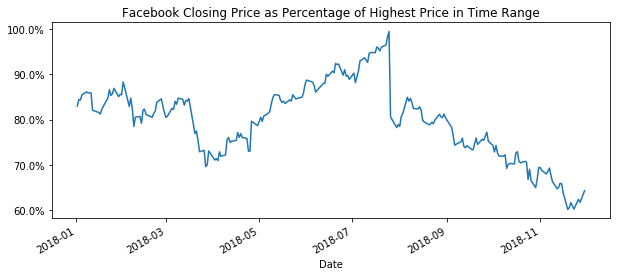

In [6]:
import matplotlib.ticker as ticker

ax = fb.Close.plot(
    figsize=(10, 4), 
    title='Facebook Closing Price as Percentage of Highest Price in Time Range'
)
ax.yaxis.set_major_formatter(
    ticker.PercentFormatter(xmax=fb.High.max())
)
ax.set_yticks([
    fb.High.max()*pct for pct in np.linspace(0.6, 1, num=5)
])

##### `MultipleLocator`
Say we have the following data. The points only take on integer values for `x`.

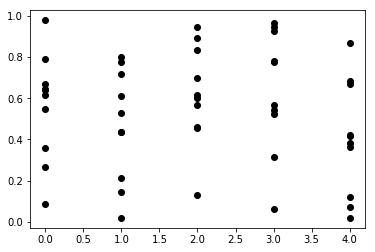

In [7]:
fig, ax = plt.subplots(1, 1)
np.random.seed(0)
ax.plot(np.tile(np.arange(0, 5), 10), np.random.rand(50), 'ko')

If we don't want to show decimal values on the x-axis, we can use the `MultipleLocator`. This will give ticks for all multiples of a number specified with the `base` parameter. To get integer values, we use `base=1`:

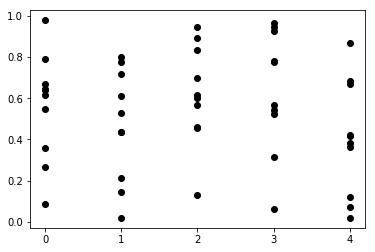

In [8]:
fig, ax = plt.subplots(1, 1)
np.random.seed(0)
ax.plot(np.tile(np.arange(0, 5), 10), np.random.rand(50), 'ko')
ax.get_xaxis().set_major_locator(
    ticker.MultipleLocator(base=1)
)